In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

cd

pwd

cd C:\Users\Payal\Project 1 DEC 2018\movie_rating_prediction-master

proj1='movie_metadata.csv'

M_df=pd.read_csv(proj1)

type(M_df)

## DATA EXPLORATION
# Information about the 'movie_metadata.csv' (original file)
M_df.info()

M_df.describe()

## DATA PRE-PROCESSING
# Removing all the empty data points and just keeping the records which has info for all the 28 attributes (by using the .dropna()function. Creating a new DataFrame 'MNew_df' which has all fill attributes.)

MNew_df=M_df.dropna()


# Information of DataFrame MNew_df. 
# The output shows that 75 % of the data (3756*100/5043) is retained after eliminating the empty data points. This 75% of the data will be used as the training dataset for EDA and ML.
MNew_df.info()

MNew_df.describe()


## DATA CATEGORIZATION FOR PRE-PROCESSING AND EDA

# Objective: To predict the IMDB rating of a movie
# Based on the above dataset (MNew_df) and aiming towards the objective, the dataset is divided into the following categories and dataframes are derived from MNew_df dataset:

# MNew_Fb_df: FaceBook Likes:6 attributes
actor_1_facebook_likes
actor_2_facebook_likes
actor_3_facebook_likes
director_facebook_likes
cast_total_facebook_likes
movie_facebook_likes

# MNew_Re_df: Movie Reviews:3 attributes
num_critic_for_reviews
num_user_for_reviews
num_voted_users

# MNew_Tr_df: Movie Transaction:2 attributes
budget
gross

# MNew_Ti_df: Movie TimeSeries: 1 attribute
title_year

# MNew_Fn_df: Facenumber in poster: 1 attribute
facenumber_in_poster


# CATEGORICAL - NOMINAL ATTRIBUTES

# MNew_MClass_df: ClassA: Movie classification:4 attributes
aspect_ratio
color
content_rating: MNew_Cr_df
duration

# MNew_PC_df: ClassB: Peoples choice/issues:3 attributes
country
genres
language

# MNew_KeyC_df: ClassC: Keyword cloud: 2 attributes
movie_title
plot_keywords

# MNew_Names_df: ClassD: Person Names: 4 attributes
actor_1_name
actor_2_name
actor_3_name
director_name



Results of Data Pre-processing and subsequent EDA: 
The objective is to predict the IMDB rating of a movie and the data set provided is 28 attributes of 5043 movies. 
In the data pre-processing phase:
1. The missing data rows are removed, since 75% of the data remains
2. Two invalid budget entries are identified and thus the rows containing them are removed
Thus, total 1285 rows are removed and a new dataframe is created. 

Exploratory Data Analysis results:
New dataframes are created based on the pre-processed dataset based on categorization of data into different types.

The times-series data shows that significantly high number of movies are from the time period year 2000 onwards. Also, based on the analysis on the categorical attributes of country and language, significantly high number of movies are from USA (80%), followed by UK (8.5%) from the 45 unique countries and the most dominant language is English (96%) from the 34 unique languages. Based on the analysis on the content rating categorical variable, 3 primary class are dominant, 45.3% are R rated, 35% are PG-13 and 15% are PG. There were total 745 unique genres in the database, and the most dominant is 'Comedy|Drama|Romance'(4%). 75% of the movies have 2 number of faces in the poster. As per the analysis of the categorical variable of aspect-ratio, the two dominant are 2.35:1 (53%) and 1.85:1 (42.3%).
The analysis of the gross, budget and the derived returns variable with respect to the imdb score of the movies shows linear increasing trend in scores for movies with higher gross. Similar relationship is observed for the numbers of reviews and the movie imdb score.Also, the movie facebook likes as well as the director and actor 3 facebook likes show a similar trend of increasing imdb score with increase in the number of facebook likes.
After this detailed exploratory understanding of the sample database, the next step is to use machine learning tools to derive the algorithm to predict the imdb score.




14700/3756

import seaborn as sns

#Creation of Dataframe Peoples choice/issues  & scores
# MNew_PC_df: ClassB: Peoples choice/issues:3 attributes
MNew_PC_df=MNew_df[['imdb_score','country','genres','language']]

# Information about the PC dataframe
MNew_PC_df.info()

MNew_PC_df[['country','genres','language']].describe()

# Code for Barplot of frequency distribution of categorical variable - country
C_count=MNew_PC_df['country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(C_count.index,C_count.values, alpha=0.9)
plt.title('Frequency Distribution of Content rating')
plt.ylabel('Number of Rating', fontsize=12)
plt.xlabel('Content', fontsize=12)


# Code for Piechart of frequency distribution of categorical variable - content_rating
labels = MNew_PC_df['country'].astype('category').cat.categories.tolist()
counts = MNew_PC_df['country'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

# Code for Barplot of frequency distribution of categorical variable - country
C_count=MNew_PC_df['language'].value_counts()
sns.set(style="darkgrid")
sns.barplot(C_count.index,C_count.values, alpha=0.9)
plt.title('Frequency Distribution of Content rating')
plt.ylabel('Number of Rating', fontsize=12)
plt.xlabel('Content', fontsize=12)


# Code for Piechart of frequency distribution of categorical variable - content_rating
labels = MNew_PC_df['language'].astype('category').cat.categories.tolist()
counts = MNew_PC_df['language'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

#Creation of Dataframe MClass & scores
# MNew_Cr_df: Content_rating: 1 attribute
MNew_MClass_df=MNew_df[['imdb_score','aspect_ratio','color','content_rating','duration']]

# Information about the Cr dataframe
MNew_MClass_df.info()

MNew_Ar=MNew_MClass_df[['aspect_ratio']].astype('object')

MNew_Ar.info()

MNew_Ar.describe()

# Printing the frequency of categorical variable
print(MNew_Ar['aspect_ratio'].value_counts())

print(MNew_Ar['aspect_ratio'].value_counts().count())

# Code for Barplot of frequency distribution of categorical variable - aspect_ratio
Ar_count=MNew_Ar['aspect_ratio'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Ar_count.index,Ar_count.values, alpha=0.9)
plt.title('Frequency Distribution of Content rating')
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Aspect_ratio', fontsize=12)


# Code for Piechart of frequency distribution of categorical variable - aspect_ratio
labels = MNew_Ar['aspect_ratio'].astype('category').cat.categories.tolist()
counts = MNew_Ar['aspect_ratio'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

# Printing the frequency of categorical variable
print(MNew_MClass_df['color'].value_counts())

MNew_MClass_df.info()

# Summary statistics of Cr dataframe
MNew_MClass_df.describe()

MNew_MClass_df.info()

# Printing the frequency of categorical variable
print(MNew_MClass_df['content_rating'].value_counts())

print(MNew_MClass_df['content_rating'].value_counts().count())

# Code for Barplot of frequency distribution of categorical variable - content_rating
Cr_count=MNew_MClass_df['content_rating'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Cr_count.index,Cr_count.values, alpha=0.9)
plt.title('Frequency Distribution of Content rating')
plt.ylabel('Number of Rating', fontsize=12)
plt.xlabel('Content', fontsize=12)


# Code for Piechart of frequency distribution of categorical variable - content_rating
labels = MNew_MClass_df['content_rating'].astype('category').cat.categories.tolist()
counts = MNew_MClass_df['content_rating'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

MNew_MClass_df.plot.scatter(x='duration', y='imdb_score')

# Printing the frequency of categorical variable
print(MNew_MClass_df['content_rating'].value_counts())

#Creation of Dataframe Facenumber in poster & scores
# MNew_Fn_df: Facenumber in poster: 1 attribute
MNew_Fn_df=MNew_df[['imdb_score','facenumber_in_poster']]

# Information about the Fn dataframe
MNew_Fn_df.info()

# Summary statistics of Fn dataframe
MNew_Fn_df.describe()

MNew_Fn_df.iloc[0:, 1:].plot.box()

MNew_Fn_df.iloc[0:, 1:].plot.hist()

MNew_Fn_df.plot.scatter(x='facenumber_in_poster', y='imdb_score')

There is a upternd in the score with increase in the number of faces on the poster.

#Creation of Dataframe Year & scores
# MNew_Ti_df: Movie TimeSeries: 1 attribute
MNew_Ti_df=MNew_df[['imdb_score','title_year']]

# Information about the Year dataframe
MNew_Ti_df.info()

# Summary statistics of Year dataframe
MNew_Ti_df.describe()

MNew_Ti_df.iloc[0:, 1:].plot.box()

MNew_Ti_df.iloc[0:, 1:].plot.hist()

MNew_Ti_df.plot.scatter(x='title_year', y='imdb_score')

The above scatter plot of title_year versus the IMDB scores shows that the movies before 1980s had higher ratings, but these are significantly lower number of movies, as can be seen from the histogram. 

#Creation of Dataframe Transaction & scores
#MNew_Re_df: Movie Reviews:2 attributes
MNew_Tr_df=MNew_df[['imdb_score', 'budget','gross']]

# Information about the Transaction dataframe
MNew_Tr_df.info()

# Summary statistics of Transaction dataframe
MNew_Tr_df.describe()

MNew_Tr_df.iloc[0:, 1:].plot.box()

The above box-plot show two distinct outliers (Budget: over 4 billion). After researching on the internet, these are wrong datapoints and the highest budget movie todate is of 379 millions (which in this database is labeled as 250 million). So, based on the research the two outliers are removed from the budget database.

# The 'budget' column is set as the index to remove the two rows where the outliers are present.
MNew_Tr_df=MNew_Tr_df.set_index('budget')

# Through this info, it can be seen that the index has changed to 'budget'
MNew_Tr_df.info()

MNew_Tr_df.head()

MNew_Tr_df.tail()

# Dropping the row in which the 1st outlier is present
MNew_Tr_df=MNew_Tr_df.drop(4200000000, axis=0)

# Dropping the row in which the 2nd outlier is present
MNew_Tr_df=MNew_Tr_df.drop(12215500000, axis=0)

MNew_Tr_df.describe()

# Resetting the index to the original from the 'budget' index.  A new dataframe containing the reset indexed column is created 'M_Tr'
M_Tr=MNew_Tr_df.reset_index()

M_Tr

# M_Tr dataframe has Range Indexing
M_Tr.info()

M_Tr.describe()

# A new column called 'Returns' is generated by subtracting the gross from the budget columns
M_Tr['Returns']=M_Tr.apply(lambda row: row.gross- row.budget, axis=1)

M_Tr.info()

M_Tr.describe()

# Sequencing the columns of the dataframe M_Tr 
M_Tr=M_Tr[['imdb_score','budget','gross','Returns']]

M_Tr.iloc[0:, 1:].plot.box()

M_Tr.iloc[0:, 1].plot.hist()

M_Tr.iloc[0:, 2].plot.hist()

M_Tr.iloc[0:, 3].plot.hist()

M_Tr.plot.scatter(x='budget', y='imdb_score')

M_Tr.plot.scatter(x='gross', y='imdb_score')

M_Tr.plot.scatter(x='Returns', y='imdb_score')

The above 3 scatter-plots of budget, gross and Returns versus IMDB scores shows the following:
1. As the budget of the movies increases, so does the imdb score
2. As the gross of the movies increases, so does the score
3. A similar relationship is observed in the returns and score, but there as few exceptions, when the score is high and the returns are negative. These negative return datapoints are worth researching.

#Creation of Dataframe of reviews & scores
#MNew_Re_df: Movie Reviews:3 attributes
MNew_Re_df=MNew_df[['imdb_score', 'num_critic_for_reviews','num_user_for_reviews','num_voted_users']]

# Information about the Reviews dataframe
MNew_Re_df.info()

# Summary statistics of Reviews dataframe
MNew_Re_df.describe()

MNew_Re_df.iloc[0:, 1:].plot.box()

MNew_Re_df.iloc[0:, 1].plot.box()

MNew_Re_df.iloc[0:, 2].plot.box()

MNew_Re_df.iloc[0:, 3].plot.box()

# A very clear relationship is observed in the below 3 scatter plots. As the number of reviews increases so does the IMDB score

This implies that the promoting the reviewing of movies can have a positive impact on that rating.

MNew_Re_df.plot.scatter(x='num_critic_for_reviews', y='imdb_score')

MNew_Re_df.plot.scatter(x='num_user_for_reviews', y='imdb_score')

MNew_Re_df.plot.scatter(x='num_voted_users', y='imdb_score')

#Creation of Dataframe of facebook likes & scores
#MNew_Fb_df: FaceBook Likes:6 attributes
MNew_Fb_df=MNew_df[['imdb_score','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','director_facebook_likes','cast_total_facebook_likes','movie_facebook_likes']]

# Information about the Facebook likes dataframe
MNew_Fb_df.info()

# Summary statistics of Facebook like dataframe
MNew_Fb_df.describe()

MNew_Fb_df.index

MNew_Fb_df.columns

MNew_Fb_df.values

MNew_Fb_df.head(20)

# EDA of Facebook likes dataframe: 
# Outliers seen in the 6 box plots
# Extremally skewed histogram of the 6 Fb like attributes


MNew_Fb_df.iloc[0:, 1:].plot.box()

MNew_Fb_df.iloc[0:, 1:].plot.hist()

# IMDB score showing the approximate bell curved histogram and the box-plot showing the tailing outliers

MNew_Fb_df.iloc[0:, 0].plot.hist()

MNew_Fb_df.iloc[0:, 0].plot.box()

# The 6 scatter plots showing the relationship between each of the Fb likes attributes to the IMDB score on the y-axis.

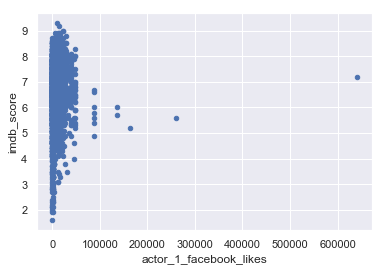

In [108]:
MNew_Fb_df.plot.scatter(x='actor_1_facebook_likes', y='imdb_score')

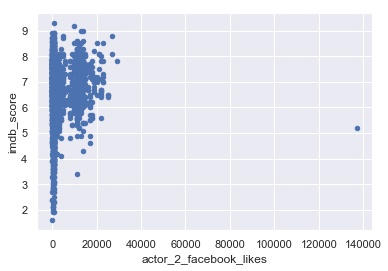

In [109]:
MNew_Fb_df.plot.scatter(x='actor_2_facebook_likes', y='imdb_score')

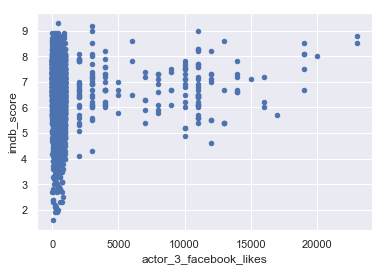

In [110]:
MNew_Fb_df.plot.scatter(x='actor_3_facebook_likes', y='imdb_score')

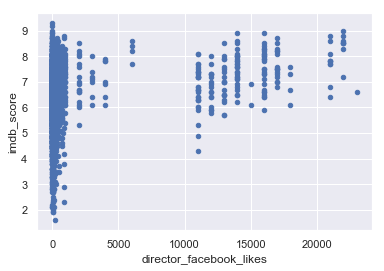

In [111]:
MNew_Fb_df.plot.scatter(x='director_facebook_likes', y='imdb_score')

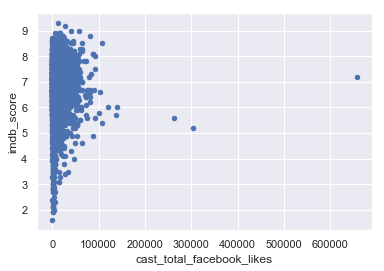

In [112]:
MNew_Fb_df.plot.scatter(x='cast_total_facebook_likes', y='imdb_score')

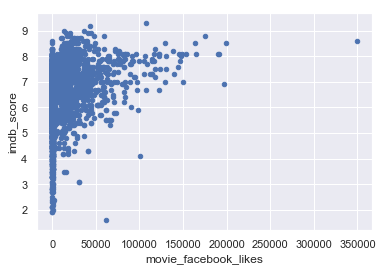

In [113]:
MNew_Fb_df.plot.scatter(x='movie_facebook_likes', y='imdb_score')

# Creating the Machine Laearning Model using Keras

In [114]:
import keras

Using TensorFlow backend.


In [117]:
import tensorflow

In [118]:
import tensorflow as tf

In [119]:
import keras

In [120]:
from keras.layers import Dense

In [121]:
import tensorflow as tf

In [122]:
import keras

In [123]:
from keras.layers import Dense

In [124]:
from keras.models import Sequential

In [164]:
MNew_Re_df.to_csv('Re_csv.csv')

In [165]:
MNew_Re_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 4 columns):
imdb_score                3756 non-null float64
num_critic_for_reviews    3756 non-null float64
num_user_for_reviews      3756 non-null float64
num_voted_users           3756 non-null int64
dtypes: float64(3), int64(1)
memory usage: 146.7 KB


In [138]:
Re_csv=pd.read_csv('Re_csv.csv')

In [136]:
pwd

'C:\\Users\\Payal\\Project 1 DEC 2018\\movie_rating_prediction-master'

In [139]:
Re_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 5 columns):
Unnamed: 0                3756 non-null int64
imdb_score                3756 non-null float64
num_critic_for_reviews    3756 non-null float64
num_user_for_reviews      3756 non-null float64
num_voted_users           3756 non-null int64
dtypes: float64(3), int64(2)
memory usage: 146.8 KB


In [158]:
import csv

In [163]:
predictors=np.genfromtxt('Re_csv.csv', delimiter=',')

In [145]:
Re_csv

,Unnamed: 0,imdb_score,num_critic_for_reviews,num_user_for_reviews,num_voted_users
0,0,7.9,723.0,3054.0,886204
1,1,7.1,302.0,1238.0,471220
2,2,6.8,602.0,994.0,275868
3,3,8.5,813.0,2701.0,1144337
4,5,6.6,462.0,738.0,212204
5,6,6.2,392.0,1902.0,383056
6,7,7.8,324.0,387.0,294810
7,8,7.5,635.0,1117.0,462669
8,9,7.5,375.0,973.0,321795
9,10,6.9,673.0,3018.0,371639


In [154]:
pd.read_csv('Re_csv.csv')

,Unnamed: 0,imdb_score,num_critic_for_reviews,num_user_for_reviews,num_voted_users
0,0,7.9,723.0,3054.0,886204
1,1,7.1,302.0,1238.0,471220
2,2,6.8,602.0,994.0,275868
3,3,8.5,813.0,2701.0,1144337
4,5,6.6,462.0,738.0,212204
5,6,6.2,392.0,1902.0,383056
6,7,7.8,324.0,387.0,294810
7,8,7.5,635.0,1117.0,462669
8,9,7.5,375.0,973.0,321795
9,10,6.9,673.0,3018.0,371639


In [174]:
n_cols=predictors.shape[1]

In [176]:
MNew_Re_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 4 columns):
imdb_score                3756 non-null float64
num_critic_for_reviews    3756 non-null float64
num_user_for_reviews      3756 non-null float64
num_voted_users           3756 non-null int64
dtypes: float64(3), int64(1)
memory usage: 146.7 KB


In [177]:
predictors_Re_df=MNew_Re_df[['num_critic_for_reviews','num_user_for_reviews','num_voted_users']]

In [178]:
predictors_Re_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 3 columns):
num_critic_for_reviews    3756 non-null float64
num_user_for_reviews      3756 non-null float64
num_voted_users           3756 non-null int64
dtypes: float64(2), int64(1)
memory usage: 117.4 KB


In [179]:
predictors_Re_df.to_csv('predictors_Re_csv.csv')

In [180]:
predictors_csv=pd.read_csv('predictors_Re_csv.csv')

In [181]:
predictors_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 4 columns):
Unnamed: 0                3756 non-null int64
num_critic_for_reviews    3756 non-null float64
num_user_for_reviews      3756 non-null float64
num_voted_users           3756 non-null int64
dtypes: float64(2), int64(2)
memory usage: 117.5 KB


In [182]:
predictors_csv.head()

,Unnamed: 0,num_critic_for_reviews,num_user_for_reviews,num_voted_users
0,0,723.0,3054.0,886204
1,1,302.0,1238.0,471220
2,2,602.0,994.0,275868
3,3,813.0,2701.0,1144337
4,5,462.0,738.0,212204


In [191]:
predictors_csv=predictors_csv.drop('Unnamed: 0', axis=1)

In [192]:
predictors_csv.head()

,num_critic_for_reviews,num_user_for_reviews,num_voted_users
0,723.0,3054.0,886204
1,302.0,1238.0,471220
2,602.0,994.0,275868
3,813.0,2701.0,1144337
4,462.0,738.0,212204


In [206]:
predictors_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 3 columns):
num_critic_for_reviews    3756 non-null float64
num_user_for_reviews      3756 non-null float64
num_voted_users           3756 non-null int64
dtypes: float64(2), int64(1)
memory usage: 88.1 KB


In [208]:
predictors_csv.to_csv('predictors_csv.csv')

In [209]:
predictors_csv.head()

,num_critic_for_reviews,num_user_for_reviews,num_voted_users
0,723.0,3054.0,886204
1,302.0,1238.0,471220
2,602.0,994.0,275868
3,813.0,2701.0,1144337
4,462.0,738.0,212204


In [222]:
predictors_csv.tail()

,num_critic_for_reviews,num_user_for_reviews,num_voted_users
3751,81.0,39.0,3924
3752,64.0,26.0,4555
3753,143.0,371.0,72639
3754,56.0,130.0,52055
3755,43.0,84.0,4285


In [227]:
predictors_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 3 columns):
num_critic_for_reviews    3756 non-null float64
num_user_for_reviews      3756 non-null float64
num_voted_users           3756 non-null int64
dtypes: float64(2), int64(1)
memory usage: 88.1 KB


In [194]:
target_df=MNew_Re_df[['imdb_score']]

In [195]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 1 columns):
imdb_score    3756 non-null float64
dtypes: float64(1)
memory usage: 58.7 KB


In [196]:
target_df.to_csv('target_csv.csv')

In [198]:
target_csv=pd.read_csv('target_csv.csv')

In [199]:
target_csv.head()

,Unnamed: 0,imdb_score
0,0,7.9
1,1,7.1
2,2,6.8
3,3,8.5
4,5,6.6


In [201]:
target_csv=target_csv.drop('Unnamed: 0', axis=1)

In [202]:
target_csv.head()

,imdb_score
0,7.9
1,7.1
2,6.8
3,8.5
4,6.6


In [211]:
target_csv.to_csv('target_csv.csv')

In [212]:
target_csv.head()

,imdb_score
0,7.9
1,7.1
2,6.8
3,8.5
4,6.6


In [228]:
predictors=np.genfromtxt('predictors_csv.csv', delimiter=',',skip_header=1)

In [229]:
n_cols=predictors.shape[1]

In [285]:
model.add(Dense(100,activation='selu',input_shape=(n_cols,)))

In [282]:
model.add(Dense(100,activation='selu'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.fit(predictors,target_csv, epochs=5)

In [ ]:
len(predictors)!=len(target_csv)

In [237]:
len(predictors)

3756

In [238]:
len(target_csv)

3756

In [271]:
model.fit(predictors,target_csv, validation_split=0.3)

Train on 2629 samples, validate on 1127 samples
Epoch 1/1
2629/2629 [==============================] - 8s 3ms/step - loss: 0.7304 - acc: 0.0418 - val_loss: 0.9148 - val_acc: 0.0417
